In [ ]:
# 완주 여행 키워드 분석
#Step 1. 필요한 모듈을 실행합니다.
from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter

okt = Okt()
kkma = Kkma( )

#Step 2 . 텍스트 파일을 불러와서 형태소 분석을 합니다.
data1 = open("c:\\data\\성수동카페_201906.txt").read( )
data1

print(data1)
print("\n")

#Step 3. 키워드를 추출합니다
data2 = okt.nouns(data1)
#data2 = kkma.nouns(data1)
print("1.추출된 키워드:", data2)
print(len(data2))

#Step 6. 불용어 제거하기
sword = open("c:\\data\\scafe_gsub.txt").read()
#print(sword)
data3 = [ each_word for each_word in data2
          if each_word not in sword ]
print(data3)

# Step 4. 용어 정리 작업하기
data4=[]
for a in data3 :
    if a == "쉑쉑" :
        data4.append(a.replace("쉑쉑","쉑쉑버거"))
    elif a=="인앤아웃" :
        data4.append(a.replace("인앤아웃","인앤아웃버거"))
    elif a=="흑설탕" :
        data4.append(a.replace("흑설탕","흑당밀크티"))
    elif a=="밀크" :
        data4.append(a.replace("밀크","흑당밀크티 "))
    elif a=="버블" :
        data4.append(a.replace("버블","흑당버블티"))
    elif a=="버블티" :
        data4.append(a.replace("버블티","흑당버블티"))
    elif a=="브루" :
        data4.append(a.replace("브루","콜드브루"))
    elif a=="빈티" :
        data4.append(a.replace("빈티","빈티지"))
    elif a=="블루" :
        data4.append(a.replace("블루","블루보틀"))
    elif a=="보틀" :
        data4.append(a.replace("보틀","블루보틀"))
    elif a=="크라이" :
        data4.append(a.replace("크라이","크라이치즈버거"))
    elif a=="감자" :
        data4.append(a.replace("감자","생감자프랜치프라이"))
    elif a=="연방" :
        data4.append(a.replace("연방","성수연방"))
    elif a=="블로그" :
        data4.append(a.replace("블로그",""))
    else :
        data4.append(a)
print(data4)

#Step 5. 추출된 단어들의 빈도를 조사한 후 많이 언급된 100개만 출력합니다
print("\n")
data5 = Counter(data4)
data6 = data5.most_common(100)

print("2.단어별 빈도수:",data6)

#Step 7. 글자수로 불용어 제거하기
data7 = []
for i in data4 :
    if len(i) >= 2 and len(i) <= 10 :
        data7.append(i) 
print(data7)

# Step 8. 단어별 빈도수 집계하기
data8 = Counter(data7)
data9 = data8.most_common(100)
print(data9)
data10 = dict(data9)

#Step 9. 워드 클라우드 그리기
wordcloud = WordCloud(font_path="c:\\windows\\fonts\\HMKMG.TTF" ,
                       relative_scaling=0.5,
                       background_color="white"
                     ).generate_from_frequencies(data10)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

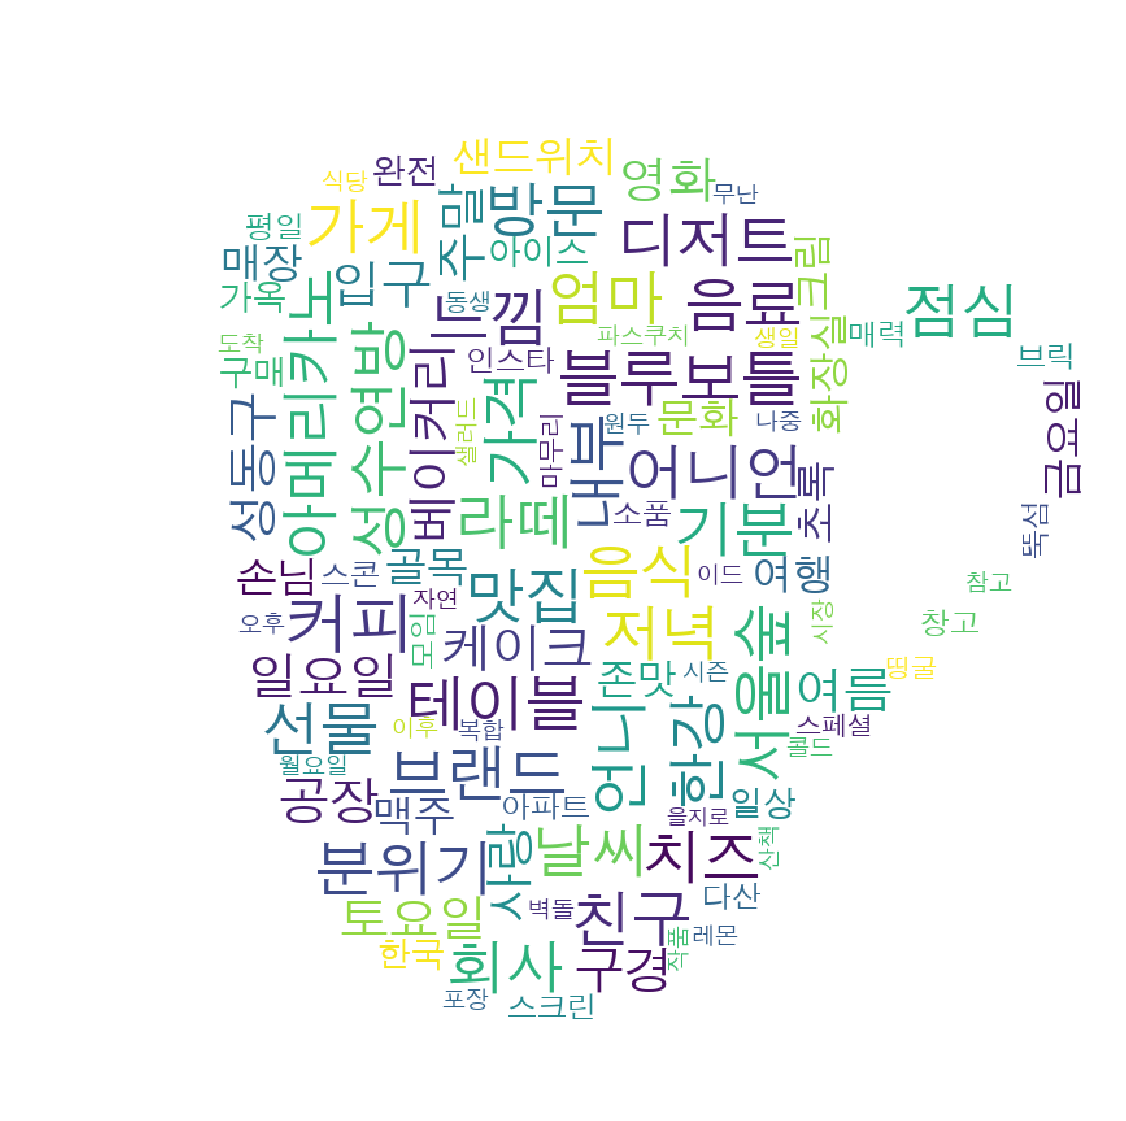

In [6]:
import numpy as np         # pip install numpy
from PIL import Image      # pip install Image
from wordcloud import ImageColorGenerator
korea = np.array(Image.open("c:\data\image\coffee.jpg"))
wc = WordCloud(font_path="c:\\windows\\fonts\\HMKMG.TTF" ,
                       relative_scaling=0.1,mask = korea,
                       background_color="white",
                       min_font_size=1,
                       max_font_size=50,
                       max_words=500
                     ).generate_from_frequencies(data10)
plt.figure(figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()